# Arms Trade Network Analysis
#### Dhruv Patel, Amrit Johar, Tejas Mattur

### Package Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite
import csv
import os
import pandas as pd
import random
import numpy
from matplotlib import pyplot
from collections import Counter
from operator import itemgetter
from networkx.algorithms.approximation import clique
from collections import Counter
from operator import itemgetter

### Network Construction

In [2]:
def create_digraph(G):
    D = nx.DiGraph()
    for u,v in G.edges():
        if D.has_edge(u,v):
            D[u][v]['weight'] += 1
        else:
            D.add_edge(u, v, weight=1)
    return D

In [3]:
data = pd.read_csv('data.csv')
G = nx.from_pandas_edgelist(data, 'Seller', 'Buyer', create_using=nx.MultiDiGraph)
D = create_digraph(G)

In [4]:
print(f'nodes: {D.number_of_nodes()}')
print(f'edges: {D.number_of_edges()}')
data

nodes: 264
edges: 2992


,YearOrdered,AmountOrdered,YearDelivered,Designation,Category,Description,AmountDelivered,Buyer,Seller
0,2011,12.0,2011,PM-43 120mm,Artillery,Mortar,12.0,Burkina Faso,Albania
1,1980,4.0,1980,N-262 Fregate,Aircraft,Transport Aircraft,4.0,Angola,Algeria
2,1967,2.0,1968,Il-28,Aircraft,Bomber Aircraft,2.0,Nigeria,Algeria
3,2016,3.0,2016,BTR-60PB,Armoured vehicles,Apc,3.0,Western Sahara,Algeria
4,1979,1.0,1979,Noratlas,Aircraft,Transport Aircraft,1.0,Congo,Angola
...,...,...,...,...,...,...,...,...,...
27760,1970,2.0,1971,G-2A Galeb,Aircraft,Trainer Aircraft,2.0,Zambia,Yugoslavia
27761,1970,4.0,1971,J-21 Jastreb,Aircraft,Ground Attack Ac,4.0,Zambia,Yugoslavia
27762,1989,1.0,1990,DHC-4 Caribou,Aircraft,Transport Aircraft,1.0,Liberia,Zambia
27763,2000,10.0,2001,2S1 122mm,Artillery,Self-Propelled Gun,10.0,Czechia,Zimbabwe


In [5]:
def graphing(G):
    plt.figure(figsize=(12, 8)) 
    degrees = [G.degree(n) for n in G.nodes()]
    degree_counts = Counter(degrees)                                                                                                 
    x, y = zip(*degree_counts.items())
    plt.scatter(x, y, marker='.',  color = 'purple')  
    plt.title('Degree Distribution of Arms Trade in Log-Log scale', fontsize=20)
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('Degree (Log)', fontsize=14)
    plt.ylabel('Frequency (Log)', fontsize=14)
    plt.show()

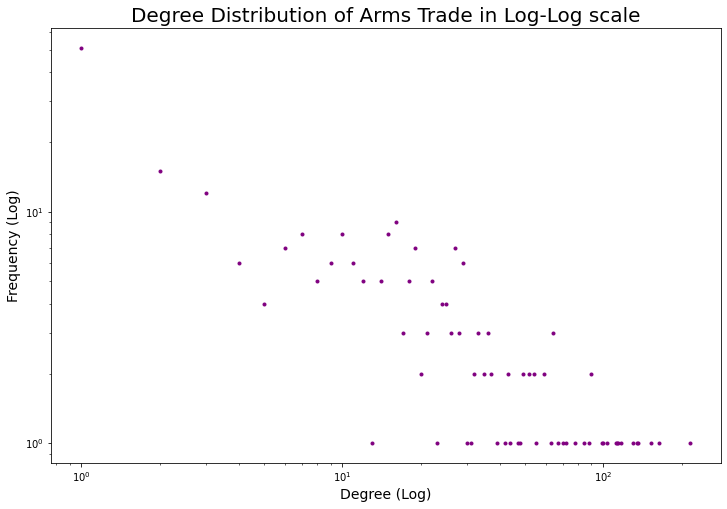

In [6]:
graphing(D)

### Centrality Functions

In [7]:
# degree centrality
def in_degreeCentralityMeasure(G, n):
    d = nx.in_degree_centrality(G)
    top = dict(Counter(d).most_common(n))
    return top
def out_degreeCentralityMeasure(G, n):
    d = nx.out_degree_centrality(G)
    top = dict(Counter(d).most_common(n))
    return top
def degreeCentralityMeasure(G, n):
    d = nx.degree_centrality(G)
    top = dict(Counter(d).most_common(n))
    return top
# closeness centrality
def closenessFinder(G, n):
    d = nx.closeness_centrality(G)
    top = dict(Counter(d).most_common(n))
    return top
# eigenVector centrality
def eigenVectorCentrality(G, n):
    d= nx.eigenvector_centrality(D)
    top = dict(Counter(d).most_common(n))
    return top
# betweenness centrality
def betweennessCentrality(G, n):
    d= nx.betweenness_centrality(D)
    top = dict(Counter(d).most_common(n))
    return top

### Full Graph Centralities

In [8]:
print("in-degree", in_degreeCentralityMeasure(D, 5))
print()
print("out-degree", out_degreeCentralityMeasure(D, 5))
print()
print("betweenness", betweennessCentrality(D, 5))
print()
print("closeness", closenessFinder(D, 5))
print()
print("eigenvector", eigenVectorCentrality(D, 5))

in-degree {'Iraq': 0.1482889733840304, 'Indonesia': 0.13688212927756654, 'Nigeria': 0.13307984790874525, 'Egypt': 0.13307984790874525, 'United States': 0.12927756653992395}

out-degree {'United States': 0.688212927756654, 'France': 0.5399239543726235, 'United Kingdom': 0.4752851711026616, 'Germany': 0.4524714828897338, 'Italy': 0.44866920152091255}

betweenness {'United States': 0.12674516266348312, 'France': 0.03687077668146762, 'Israel': 0.03581671847943496, 'United Kingdom': 0.0336519506975175, 'Jordan': 0.02696062875203462}

closeness {'United States': 0.22650977974171893, 'Iraq': 0.22549404081911034, 'Nigeria': 0.22348964934516263, 'Jordan': 0.21674642716664483, 'Indonesia': 0.21489389360111794}

eigenvector {'Iraq': 0.1604787453587017, 'Jordan': 0.15369117467246535, 'Nigeria': 0.15100487245856808, 'Indonesia': 0.15095463320994704, 'Pakistan': 0.14789072171562415}


### Temporal Analysis

In [9]:
def create_temporal_graph(startYear, endYear):
    data_War = data.loc[(data['YearOrdered'] >= startYear) & (data['YearOrdered'] <= endYear)]
    G_War=nx.from_pandas_edgelist(data_War, 'Seller', 'Buyer', create_using=nx.MultiDiGraph)
    D = create_digraph(G_War)
    return D

In [10]:
G_ColdWar= create_temporal_graph(1947, 1991)
print(in_degreeCentralityMeasure(G_ColdWar, 5))
print()
print(out_degreeCentralityMeasure(G_ColdWar, 5))

{'Egypt': 0.11483253588516745, 'Iraq': 0.11004784688995214, 'Iran': 0.11004784688995214, 'Morocco': 0.10047846889952153, 'India': 0.10047846889952153}

{'United States': 0.6650717703349283, 'France': 0.5502392344497608, 'United Kingdom': 0.5263157894736842, 'Germany': 0.41148325358851673, 'Italy': 0.41148325358851673}


In [11]:
G_Afghanistan= create_temporal_graph(1999, 2021)
print(in_degreeCentralityMeasure(G_Afghanistan, 5))
print()
print(out_degreeCentralityMeasure(G_Afghanistan, 5))

{'Indonesia': 0.14150943396226415, 'UAE': 0.13679245283018868, 'Iraq': 0.1320754716981132, 'United States': 0.12735849056603774, 'Malaysia': 0.12264150943396226}

{'United States': 0.6509433962264151, 'France': 0.5047169811320754, 'Russia': 0.44811320754716977, 'Italy': 0.4245283018867924, 'Germany': 0.410377358490566}


### Attribute Analysis

In [12]:
data_army = data.loc[(data['Category'] == 'Armoured vehicles') ^ (data['Category'] == 'Artillery')]
G_army = nx.from_pandas_edgelist(data_army, 'Seller', 'Buyer', create_using=nx.MultiDiGraph)
D_army = create_digraph(G_army)

In [13]:
print("ARMY")
print()
print("in degree", in_degreeCentralityMeasure(D_army, 5))
print()
print("out degree", out_degreeCentralityMeasure(D_army, 5))
print()
print("betweenness", betweennessCentrality(D_army, 5))
print()
print("closeness", closenessFinder(D_army, 5))
print()
print("eigenvector", eigenVectorCentrality(D_army, 5))

ARMY

in degree {'Iraq': 0.15196078431372548, 'Nigeria': 0.11274509803921569, 'Indonesia': 0.10784313725490197, 'Saudi Arabia': 0.09313725490196079, 'Egypt': 0.08823529411764705}

out degree {'United States': 0.5490196078431373, 'United Kingdom': 0.43137254901960786, 'France': 0.4166666666666667, 'China': 0.3676470588235294, 'Soviet Union': 0.3137254901960784}

betweenness {'United States': 0.12674516266348312, 'France': 0.03687077668146762, 'Israel': 0.03581671847943496, 'United Kingdom': 0.0336519506975175, 'Jordan': 0.02696062875203462}

closeness {'Iraq': 0.18424440483264012, 'Jordan': 0.14592156862745098, 'Somalia': 0.1428889737713267, 'Morocco': 0.14088968920901693, 'Indonesia': 0.13818330362448009}

eigenvector {'Iraq': 0.1604787453587017, 'Jordan': 0.15369117467246535, 'Nigeria': 0.15100487245856808, 'Indonesia': 0.15095463320994704, 'Pakistan': 0.14789072171562415}


In [14]:
G_aircraft = nx.from_pandas_edgelist(data[data['Category'] == 'Aircraft'], 'Seller', 'Buyer', create_using=nx.MultiDiGraph)
D_aircraft = create_digraph(G_aircraft)

In [15]:
print("AIRCRAFT")
print()
print("in degree", in_degreeCentralityMeasure(D_aircraft, 5))
print()
print("out degree", out_degreeCentralityMeasure(D_aircraft, 5))
print()
print("betweenness", betweennessCentrality(D_aircraft, 5))
print()
print("closeness", closenessFinder(D_aircraft, 5))
print()
print("eigenvector", eigenVectorCentrality(D_aircraft, 5))

AIRCRAFT

in degree {'United States': 0.14634146341463414, 'Pakistan': 0.13170731707317074, 'Peru': 0.12682926829268293, 'Angola': 0.12195121951219512, 'Jordan': 0.12195121951219512}

out degree {'United States': 0.7560975609756098, 'France': 0.6, 'Italy': 0.4878048780487805, 'United Kingdom': 0.47317073170731705, 'Germany': 0.4146341463414634}

betweenness {'United States': 0.12674516266348312, 'France': 0.03687077668146762, 'Israel': 0.03581671847943496, 'United Kingdom': 0.0336519506975175, 'Jordan': 0.02696062875203462}

closeness {'United States': 0.2332183224271267, 'Jordan': 0.2332183224271267, 'Nigeria': 0.2265865217893885, 'Pakistan': 0.2265865217893885, 'Ecuador': 0.2207261891623441}

eigenvector {'Iraq': 0.1604787453587017, 'Jordan': 0.15369117467246535, 'Nigeria': 0.15100487245856808, 'Indonesia': 0.15095463320994704, 'Pakistan': 0.14789072171562415}


In [16]:
data_navy = data.loc[(data['Category'] == 'Naval weapons') ^ (data['Category'] == 'Ships')]
data_navy
G_navy = nx.from_pandas_edgelist(data_navy, 'Seller', 'Buyer', create_using=nx.MultiDiGraph)
D_navy = create_digraph(G_navy)

In [17]:
print("NAVY")
print()
print("in degree", in_degreeCentralityMeasure(D_navy, 5))
print()
print("out degree", out_degreeCentralityMeasure(D_navy, 5))
print()
print("betweenness", betweennessCentrality(D_navy, 5))
print()
print("closeness", closenessFinder(D_navy, 5))
print()
print("eigenvector", eigenVectorCentrality(D_navy, 5))

NAVY

in degree {'Indonesia': 0.10897435897435898, 'Egypt': 0.10897435897435898, 'India': 0.08974358974358974, 'Iran': 0.08333333333333333, 'Nigeria': 0.08333333333333333}

out degree {'United States': 0.5128205128205128, 'United Kingdom': 0.4358974358974359, 'France': 0.3717948717948718, 'Germany': 0.358974358974359, 'Italy': 0.358974358974359}

betweenness {'United States': 0.12674516266348312, 'France': 0.03687077668146762, 'Israel': 0.03581671847943496, 'United Kingdom': 0.0336519506975175, 'Jordan': 0.02696062875203462}

closeness {'Egypt': 0.14245014245014245, 'Indonesia': 0.13776428250112463, 'Nigeria': 0.126232741617357, 'India': 0.12155745489078822, 'Iran': 0.12040133779264214}

eigenvector {'Iraq': 0.1604787453587017, 'Jordan': 0.15369117467246535, 'Nigeria': 0.15100487245856808, 'Indonesia': 0.15095463320994704, 'Pakistan': 0.14789072171562415}


### Reciprocity and Neighborhood Overlap

In [18]:
reciprocities_dict = {}
reciprocities_list = []
for node in D.nodes:
    rec = nx.reciprocity(D, node)
    if rec:
        reciprocities_dict[node] = rec
        reciprocities_list.append((node, rec))
reciprocities_list.sort(key = lambda x: x[1], reverse = True)
reciprocities_list.pop(0)
reciprocities_list[:10]

[('Finland', 0.46153846153846156),
 ('Norway', 0.4406779661016949),
 ('Denmark', 0.3728813559322034),
 ('Sweden', 0.36893203883495146),
 ('Jordan', 0.3333333333333333),
 ('Mujahedin (Afghanistan)*', 0.3333333333333333),
 ('United Kingdom', 0.3157894736842105),
 ('Austria', 0.3125),
 ('Netherlands', 0.30303030303030304),
 ('United States', 0.28837209302325584)]

In [19]:
def neighborhood_overlap(countries):
    
    def calculate_overlap(G, u, v):
        n_common_nbrs = len(set(nx.common_neighbors(G, u, v)))
        n_join_nbrs = G.degree(u) + G.degree(v) - n_common_nbrs - 2
        return n_common_nbrs / n_join_nbrs
    
    G_multi = nx.from_pandas_edgelist(data, 'Seller', 'Buyer', create_using=nx.MultiGraph)
    G_regular = nx.Graph()
    for u,v in G_multi.edges():
        if G_regular.has_edge(u,v):
            G_regular[u][v]['weight'] += 1
        else:
            G_regular.add_edge(u, v, weight=1)
    overlaps = {}
    for i in range(len(countries)):
        for j in range(i+1, len(countries)):
            overlap = calculate_overlap(G_regular, countries[i], countries[j])
            overlaps[(countries[i], countries[j])] = overlap
    return overlaps

In [20]:
def reciprocity(countries):
    recs = {}
    for country in countries:
        recs[country] = reciprocities_dict[country]
    return recs

In [21]:
print("NORDIC COUNTRIES")
countries = ['Denmark', 'Finland', 'Norway', 'Sweden']
overlaps = neighborhood_overlap(countries)
recips = reciprocity(countries)
overlaps, recips

NORDIC COUNTRIES


({('Denmark', 'Finland'): 0.43333333333333335,
  ('Denmark', 'Norway'): 0.4603174603174603,
  ('Denmark', 'Sweden'): 0.4444444444444444,
  ('Finland', 'Norway'): 0.4482758620689655,
  ('Finland', 'Sweden'): 0.40229885057471265,
  ('Norway', 'Sweden'): 0.4222222222222222},
 {'Denmark': 0.3728813559322034,
  'Finland': 0.46153846153846156,
  'Norway': 0.4406779661016949,
  'Sweden': 0.36893203883495146})

In [22]:
print("WESTERN EUROPEAN COUNTRIES")
countries = ['United Kingdom', 'France', 'Germany', 'Italy', 'Spain', 'Poland']
overlaps = neighborhood_overlap(countries)
recips = reciprocity(countries)
overlaps, recips

WESTERN EUROPEAN COUNTRIES


({('United Kingdom', 'France'): 0.6708074534161491,
  ('United Kingdom', 'Germany'): 0.6442953020134228,
  ('United Kingdom', 'Italy'): 0.6896551724137931,
  ('United Kingdom', 'Spain'): 0.4794520547945205,
  ('United Kingdom', 'Poland'): 0.34057971014492755,
  ('France', 'Germany'): 0.7105263157894737,
  ('France', 'Italy'): 0.6883116883116883,
  ('France', 'Spain'): 0.5298013245033113,
  ('France', 'Poland'): 0.35135135135135137,
  ('Germany', 'Italy'): 0.6737588652482269,
  ('Germany', 'Spain'): 0.5,
  ('Germany', 'Poland'): 0.3333333333333333,
  ('Italy', 'Spain'): 0.4785714285714286,
  ('Italy', 'Poland'): 0.3968253968253968,
  ('Spain', 'Poland'): 0.3125},
 {'United Kingdom': 0.3157894736842105,
  'France': 0.24539877300613497,
  'Germany': 0.25,
  'Italy': 0.16923076923076924,
  'Spain': 0.2,
  'Poland': 0.23880597014925373})

In [23]:
print("NORTH AMERICAN COUNTRIES")
countries = ['United States', 'Canada', 'Mexico']
overlaps = neighborhood_overlap(countries)
recips = reciprocity(countries)
overlaps, recips

NORTH AMERICAN COUNTRIES


({('United States', 'Canada'): 0.6162162162162163,
  ('United States', 'Mexico'): 0.12021857923497267,
  ('Canada', 'Mexico'): 0.1794871794871795},
 {'United States': 0.28837209302325584,
  'Canada': 0.2537313432835821,
  'Mexico': 0.08333333333333333})

In [24]:
print("MIDDLE EASTERN COUNTRIES")
countries = ['Libya', 'Iran', 'Syria', 'UAE']
overlaps = neighborhood_overlap(countries)
recips = reciprocity(countries)
overlaps, recips

MIDDLE EASTERN COUNTRIES


({('Libya', 'Iran'): 0.2903225806451613,
  ('Libya', 'Syria'): 0.21428571428571427,
  ('Libya', 'UAE'): 0.24705882352941178,
  ('Iran', 'Syria'): 0.28,
  ('Iran', 'UAE'): 0.3246753246753247,
  ('Syria', 'UAE'): 0.2},
 {'Libya': 0.1702127659574468,
  'Iran': 0.14285714285714285,
  'Syria': 0.13793103448275862,
  'UAE': 0.19444444444444445})

In [25]:
print("AFRICAN COUNTRIES")
countries = ['Zimbabwe', 'Sudan', 'Uganda', 'Ghana']
overlaps = neighborhood_overlap(countries)
recips = reciprocity(countries)
overlaps, recips

AFRICAN COUNTRIES


({('Zimbabwe', 'Sudan'): 0.325,
  ('Zimbabwe', 'Uganda'): 0.5,
  ('Zimbabwe', 'Ghana'): 0.4375,
  ('Sudan', 'Uganda'): 0.38461538461538464,
  ('Sudan', 'Ghana'): 0.30952380952380953,
  ('Uganda', 'Ghana'): 0.46875},
 {'Zimbabwe': 0.08333333333333333,
  'Sudan': 0.06060606060606061,
  'Uganda': 0.08,
  'Ghana': 0.07692307692307693})

### Gephi Graphs

In [26]:
# UNCOMMENT this code to create the gephi graphs

# nx.write_gexf(D, "wholeGraph.gexf")
# nx.write_gexf(G_ColdWar, "coldWar.gexf")
# nx.write_gexf(G_Afghanistan, "afghanistan.gexf")
# nx.write_gexf(D_navy, "navy.gexf")